In [0]:
import pandas as p
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [0]:
import pandas as pd
dbutils.fs.cp("dbfs:/FileStore/shared_uploads/rosangeles14@gmail.com/titanic.csv", "file:///tmp/titanic.csv")

df = pd.read_csv("file:///tmp/titanic.csv")
plt.style.use('seaborn-ticks')

##Conociendo el DataFrame

In [0]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Estructura de los datos

###Conociendo los tipos de datos y cuantas variable de cada tipo tenemos

In [0]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###Existen observaciones nulas?

In [0]:
df.isna().any() 

Out[29]: PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

###Cantidad de observaciones nulas?

In [0]:
df.isna().sum()

Out[30]: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###Proporsion de observaciones nulas?

Se puede observar que de la variable sexo el 19% es nulo, mientras que la variable cabin el 78% no esta disponible. Esta última se estará excluyendo del dataset.

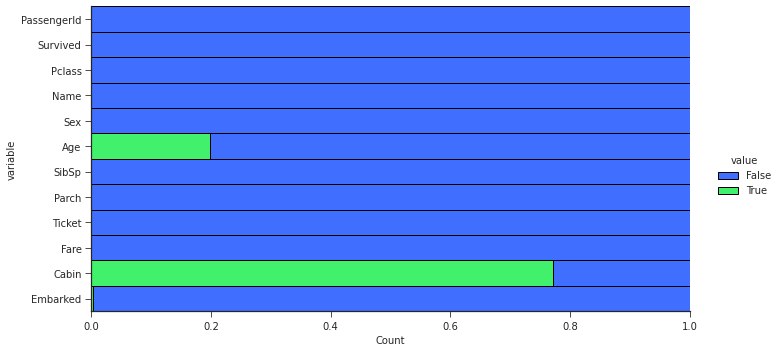

In [0]:
(
    df.isnull()
    .melt()
    .pipe(lambda df: (
        sns.displot(data= df, y='variable', hue='value', multiple='fill', aspect=2)
    ))
);

###Limpieza del dataFrame

In [0]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:

#Agregar el nombre completo del embarque
df['Pclass'] = df['Pclass'].astype('object')
df['Embarked'] = df['Embarked'].replace(['C','Q','S'],['Cherbourg','Queenstown','Southampton'])

#Clasificar la clase
df['Pclass'] = df['Pclass'].replace([1,2,3],['Primera Clase','Segunda Clase','Tercera Clase'])

#Agregar columna para los rango de Edad
df.loc[df['Age'].between(0,11) , 'AgeRange'] = '0-11'
df.loc[df['Age'].between(12,19), 'AgeRange'] = '12-19'
df.loc[df['Age'].between(20,26), 'AgeRange'] = '20-26'
df.loc[df['Age'].between(27,59), 'AgeRange'] = '27-59'
df.loc[df['Age']>60, 'AgeRange'] = '60-100'

#Agregar columna para los no sobrevivientes
df['NoSurvived'] =  np.where(df['Survived']==0,1,0) 
#Seleccionar variables a analizar
df_res = df[['Survived','Pclass','Sex','Fare','Embarked','Age','NoSurvived','AgeRange']]
#Agrupar df por clase y sexo
df_survived = df_res.groupby(['Pclass','Sex',]).agg({'Survived':'sum','NoSurvived':'sum'}).reset_index()



###Qué porcentaje de la población sobrevivió?
Solo el 61% sobrevivió.

In [0]:
(df_survived.NoSurvived.sum() / df.shape[0])


Out[34]: 0.6161616161616161

###Qué porcentaje de la población no sobrevivió?
EL  30% de la población sobrevivió 

In [0]:
df_survived.Survived.sum() / df.shape[0]

Out[35]: 0.3838383838383838

###Distribución de las variables

La mayor concentración de la población se encontraba entre los 20 y 30 años de edad. La tercera clase contaba con un número mayor de pasajeros, lo cuales eran hombres
De los tres puesto de embarque disponible, Southamtom enbarco la mayoría de los pasajeros

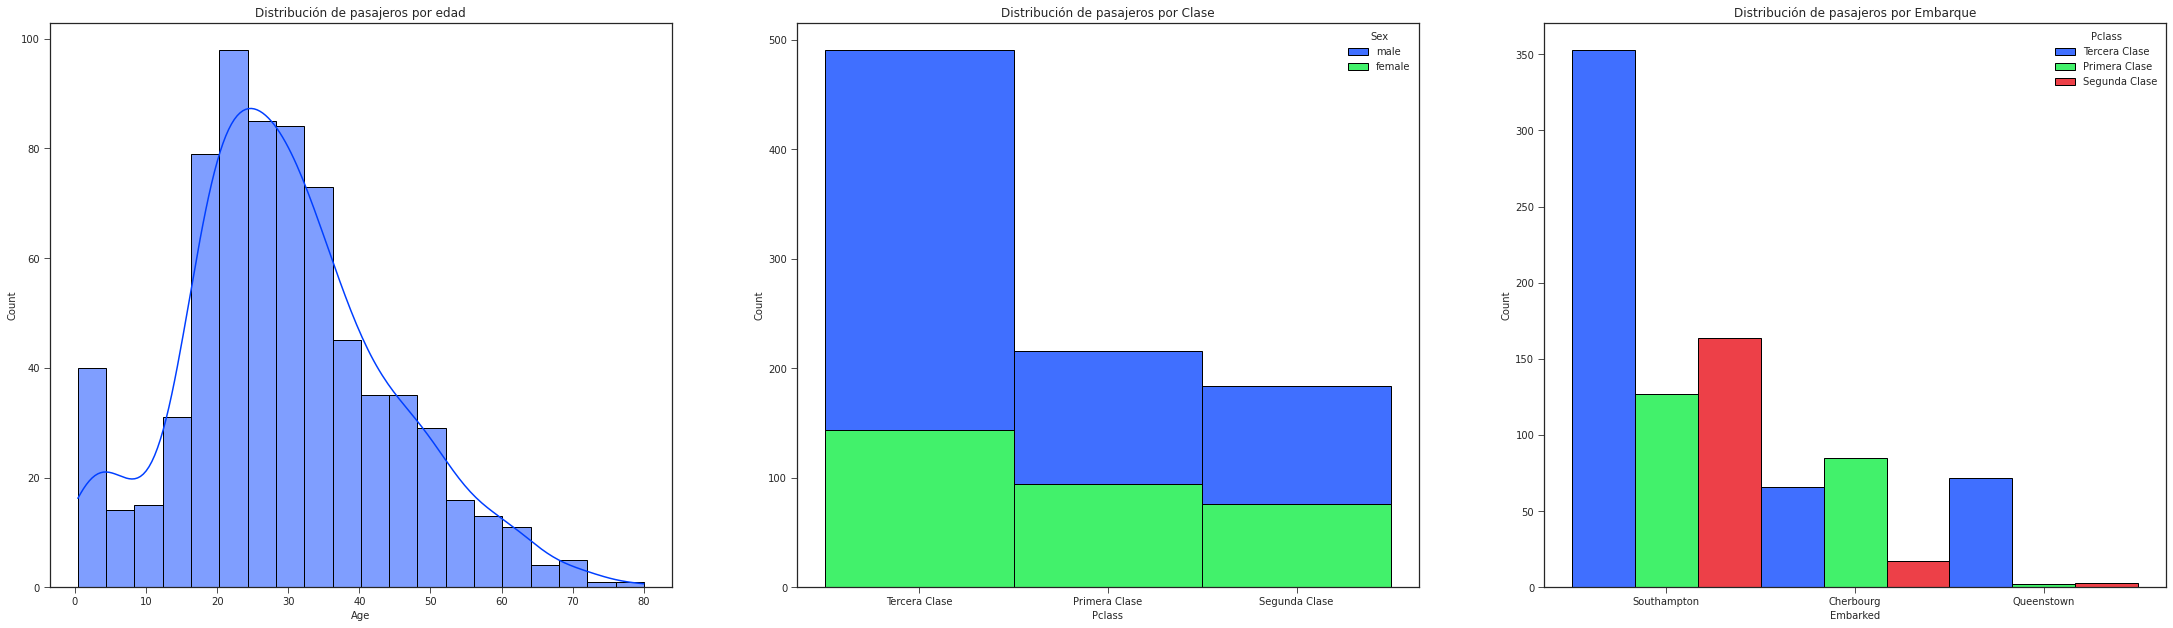

In [0]:
ófig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,  figsize=(30, 8) )
sns.histplot( data=df, x = 'Age' ,  kde=True,ax= ax1)
sns.histplot( data=df, x = 'Pclass',hue='Sex' , multiple="stack", ax= ax2)
sns.histplot(data=df, x='Embarked',hue='Pclass', multiple='dodge',  ax= ax3  );
#sns.histplot(data=df, x='AgeRange', hue='Sex', multiple='dodge', ax= ax4  );
ax1.set_title('Distribución de pasajeros por edad');
ax2.set_title('Distribución de pasajeros por Clase');
ax3.set_title('Distribución de pasajeros por Embarque');


### Como esta distribuidos las cantidad de sobrevivientes?
Hubo mas sobrevivientes del sexo femenino, ya que al momento del accidente se le dio prioridad a los niños y mujeres de primera clase. Se puede verificar que la mayoria de los no sobrevivientes fueron hombres de tercera clase.  

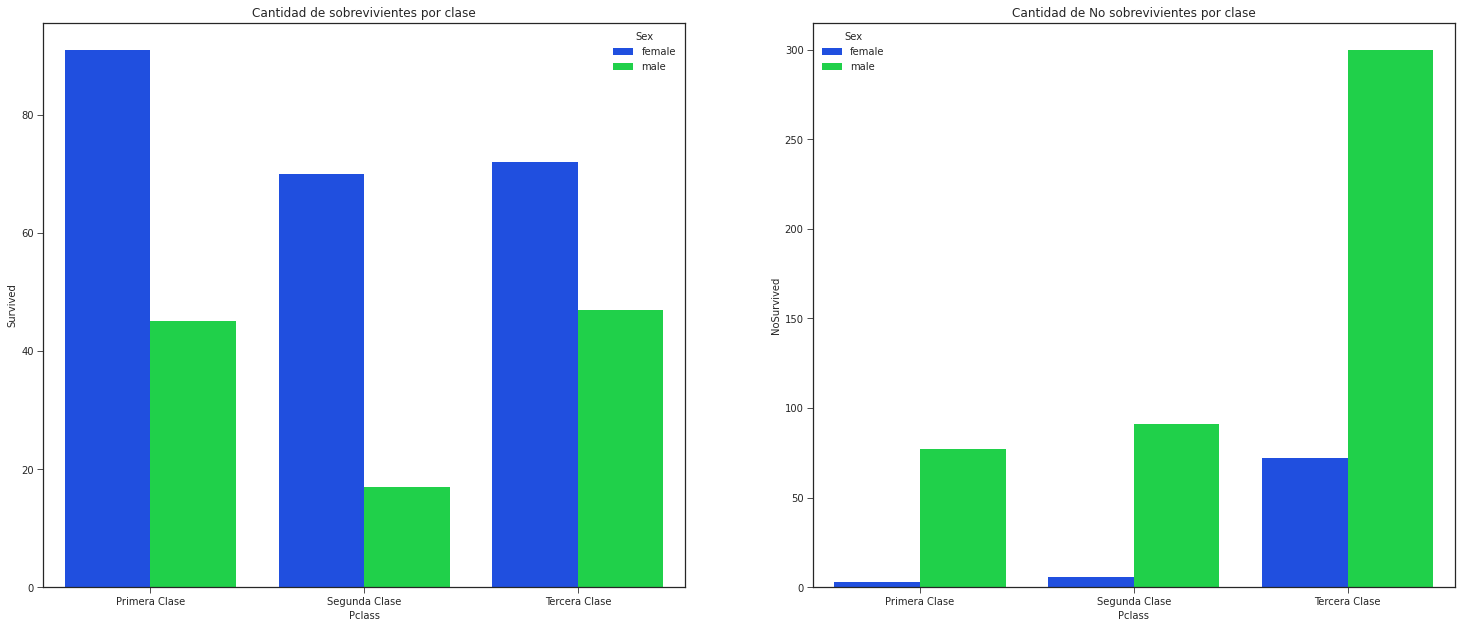

In [0]:

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(20, 8) )
sns.barplot( data=df_survived, x = 'Pclass', y= 'Survived' ,hue='Sex', ax= ax1)
sns.barplot( data=df_survived, x = 'Pclass', y= 'NoSurvived' ,hue='Sex', ax= ax2)

ax1.set_title('Cantidad de sobrevivientes por clase');
ax2.set_title('Cantidad de No sobrevivientes por clase');
 

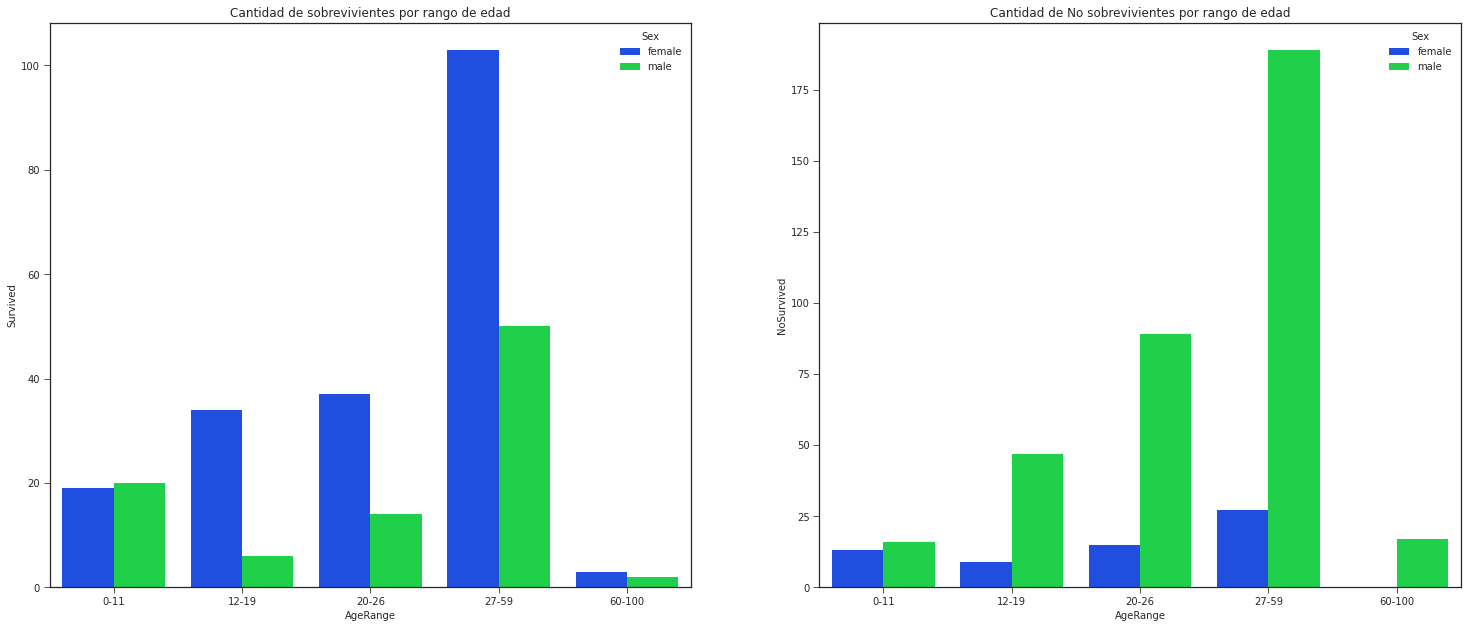

In [0]:
df_byAge = df.groupby(['AgeRange','Sex'])['Survived'].sum().reset_index()
df_byAgeNoSurvived = df.groupby(['AgeRange','Sex'])['NoSurvived'].sum().reset_index()

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(20, 8) )
sns.barplot( data=df_byAge, x = 'AgeRange', y= 'Survived' ,hue='Sex', ax= ax1)
sns.barplot( data=df_byAgeNoSurvived, x = 'AgeRange', y= 'NoSurvived' ,hue='Sex', ax= ax2);
ax1.set_title('Cantidad de sobrevivientes por rango de edad');
ax2.set_title('Cantidad de No sobrevivientes por rango de edad');
 


###Cuál era la relación entre la edad de los población y el pago realizada para embarcar en el titanic?

El costo de la voleta estaba mas relacionado a las clase, y si tenian cabinas.

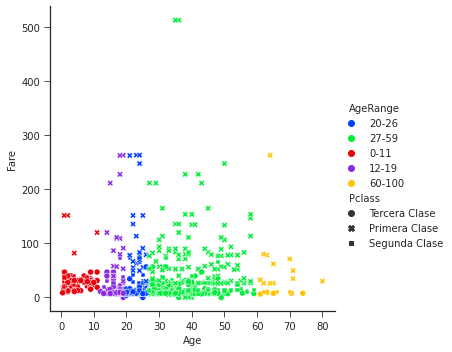

In [0]:

sns.relplot(data=df, x='Age', y='Fare', hue='AgeRange',style='Pclass' );

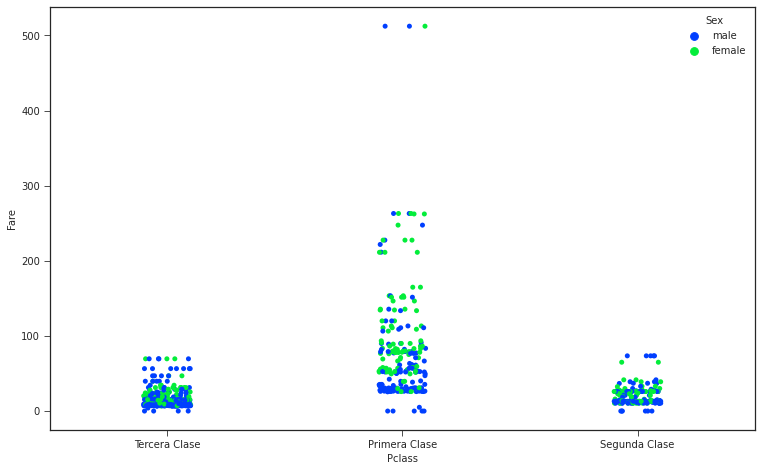

In [0]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='Pclass', y='Fare', hue='Sex' );
